# Join and Cleaning Data

In [1]:
# import all needed packages
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
# import data
df1 = pd.read_csv('./data-crawling/digital-supply-chain-details.csv')
df2 = pd.read_csv('./data-crawling/supply-chain-technology-details.csv')

# concat data frames
frames = pd.concat([df1, df2], ignore_index=True)

# remove column '_id'
frames = frames.drop(['_id'], axis=1)

# remove duplicated rows
frames = frames.drop_duplicates()

# reset index
frames = frames.reset_index(drop=True)

In [3]:
print(frames.head())
print(frames.info())

                                                 url  \
0  https://www.mendeley.com/catalogue/77851670-19...   
1  https://www.mendeley.com/catalogue/ee471ccc-46...   
2  https://www.mendeley.com/catalogue/794eacdc-05...   
3  https://www.mendeley.com/catalogue/4be64c43-87...   
4  https://www.mendeley.com/catalogue/5652f74d-17...   

                                               title  \
0  Managing the digital supply chain: The role of...   
1  Dynamic capabilities and institutional theorie...   
2  Digital Supply Chain: Literature review and a ...   
3  Digital supply chain through dynamic inventory...   
4  A digital supply chain twin for managing the d...   

                                 publihser  \
0                Technovation (2020) 96-97   
1  Supply Chain Forum (2020) 21(3) 139-157   
2  Computers in Industry (2018) 97 157-177   
3                 Mathematics (2019) 7(12)   
4   Production Planning and Control (2020)   

                               doc_id  \
0  10.10

In [4]:
# # export to csv
# frames.to_csv('./data-crawling/raw-data.csv', index=False)

# Extract Data
extracting publisher and year from column 'publisher'

In [5]:
publisher = pd.read_csv('./data-crawling/raw-data.csv', usecols=['publihser'])

In [6]:
print(publisher.head())
print(publisher.info())

                                 publihser
0                Technovation (2020) 96-97
1  Supply Chain Forum (2020) 21(3) 139-157
2  Computers in Industry (2018) 97 157-177
3                 Mathematics (2019) 7(12)
4   Production Planning and Control (2020)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   publihser  3698 non-null   object
dtypes: object(1)
memory usage: 29.0+ KB
None


In [7]:
def search_year(text):
    """get published year from text"""
    all_years = ['1990', '1991', '1992', '1993', '1994', '1995', 
                 '1996', '1997', '1998', '1999', '2000', '2001',
                 '2002', '2003', '2004', '2005', '2006', '2007',
                 '2008', '2009', '2010', '2011', '2012', '2013',
                 '2014', '2015', '2016', '2017', '2018', '2019',
                 '2020', '2021']
    for year in all_years:
        y = re.search(year, text)
        if y:
            return year

In [8]:
def search_publisher(text):
    """get publisher's name from text"""
    publisher = []
    text = text.lower()
    items = text.split()
    for elem in items:
        if elem.isalpha():
            publisher.append(elem)
    
    return ' '.join(publisher)

# Functions Test

In [9]:
sample = [publisher['publihser'][i] for i in range(10)]
for s in sample:
    year = search_year(s)
    p = search_publisher(s)
    print(p, year)

technovation 2020
supply chain forum 2020
computers in industry 2018
mathematics 2019
production planning and control 2020
journal of modelling in management 2020
benchmarking 2019
international journal of supply chain management 2020
international journal of supply chain management 2020
journal of manufacturing technology management 2019


# Apply function search_year() and search_publisher() to dataframe

In [10]:
splitted_data = []

for p in publisher['publihser']:
    publish = search_publisher(p)
    year = search_year(p)
    splitted_data.append([publish, year])

In [11]:
# create new DataFrame
df = pd.DataFrame(splitted_data, columns=['publisher', 'year_published'])

# drop NA row
df = df.dropna()

# remove empty string
df = df[df['publisher'].astype(bool)]

# reset index
df = df.reset_index(drop=True)

# # export to new csv file
# df.to_csv('./data-crawling/publisher-year.csv', index=False)

In [12]:
print(df.head())
print(df.info())

                         publisher year_published
0                     technovation           2020
1               supply chain forum           2020
2            computers in industry           2018
3                      mathematics           2019
4  production planning and control           2020
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   publisher       3496 non-null   object
 1   year_published  3496 non-null   object
dtypes: object(2)
memory usage: 54.8+ KB
None


In [13]:
# df = pd.read_csv('./data-crawling/only-publisher.csv')
# # df['year_published']

# Trends year by year publication

In [14]:
year_trends = df['year_published'].value_counts().index.tolist()
value_trends = df['year_published'].value_counts().tolist()

In [15]:
df['year_published'].value_counts()

2020    679
2019    578
2018    371
2017    319
2016    236
2015    193
2014    154
2012    119
2013    107
2011     97
2010     92
2008     76
2007     66
2009     57
2005     54
2004     45
2006     44
2001     42
2003     31
2000     29
2021     29
2002     24
1999     17
1997     10
1998      6
1995      5
1996      5
1990      4
1993      3
1991      3
1994      1
Name: year_published, dtype: int64

In [16]:
trend_dict = {}
for i in range(len(year_trends)):
    trend_dict[year_trends[i]] = value_trends[i]

In [17]:
# sorting from older year
trend_items = trend_dict.items()
trend_dict = sorted(trend_items)

In [18]:
# convert to DataFrame
td = pd.DataFrame(trend_dict, columns=['year', 'number_publications'])

In [19]:
# # extract to csv
# td.to_csv('./data-crawling/publication-year-by-year.csv', index=False)

In [20]:
td = pd.DataFrame(trend_dict, columns=['year', 'number_publications'])

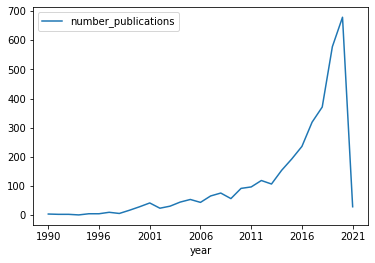

In [21]:
# plotting graphic of publications by year
ax = plt.gca() #gca --> get current axis
td.plot(kind='line',x='year', y='number_publications', ax=ax)
plt.show()

In [22]:
# # save graphic
# plt.savefig('./images/trends-by-year.png')

# Top 10 Publishers

In [23]:
# counting publishers
publisher_list = df['publisher'].value_counts()[:10].sort_values(ascending=True).index.tolist()
publisher_value = df['publisher'].value_counts()[:10].sort_values(ascending=True).tolist()

In [24]:
# create Data Frame
top10_dict = {}
for i in range(len(publisher_list)):
    top10_dict[publisher_list[i]] = publisher_value[i]

d = [top10_dict]
top_df = pd.DataFrame.from_dict(d)
top_df = pd.melt(top_df).rename(columns={
    'variable':'publisher',
    'value':'number_publications'
})

In [25]:
top_df

,publisher,number_publications
0,computers and industrial engineering,25
1,production planning and control,29
2,ieee access,34
3,supply chain management,37
4,ssrn electronic journal,45
5,journal of cleaner production,47
6,international journal of production economics,53
7,sustainability,57
8,international journal of production research,62
9,international journal of supply chain management,119


In [26]:
# # export to_csv
# top_df.to_csv('./data-crawling/top-ten-publishers.csv', index=False)

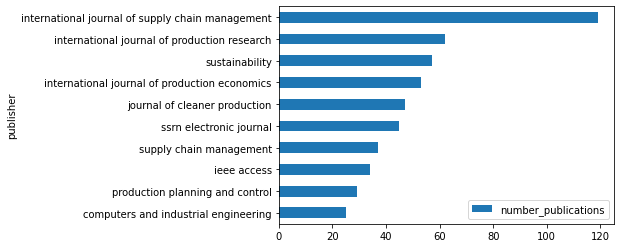

In [27]:
# plot top 10 publishers graphic
top_df.plot(kind='barh', x='publisher', y='number_publications')
plt.show()

In [28]:
# # save graphic
# plt.savefig('./images/top-ten-publishers.png')

# Publications Per Year Per Publisher

In [29]:
all_top = []
for tp in publisher_list:
    data = df[df['publisher'] == tp]
    all_top.append(data)

In [30]:
for d in range(len(all_top)):
    all_top[d] = all_top[d].reset_index(drop=True)

In [31]:
display_data = {}
for i in range(len(all_top)):
    year = all_top[i]['year_published'].value_counts().sort_values(ascending=True).index.tolist()
    year_freq = all_top[i]['year_published'].value_counts().sort_values(ascending=True).tolist()
    publsh = all_top[i]['publisher'].value_counts().index.tolist()
    year_data = {}
    for i in range(len(year)):
        year_data[year[i]] = year_freq[i]
    display_data[publsh[0]] = year_data

In [32]:
dd_df = pd.DataFrame.from_dict(display_data)

In [33]:
dd_df = dd_df.sort_index()

In [34]:
dd_df

,computers and industrial engineering,production planning and control,ieee access,supply chain management,ssrn electronic journal,journal of cleaner production,international journal of production economics,sustainability,international journal of production research,international journal of supply chain management
2002,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
2004,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN
2007,NaN,1.0,NaN,3.0,NaN,NaN,1.0,NaN,1.0,NaN
2008,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN
2009,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,2.0,NaN
2010,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0,NaN
2011,1.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN
2012,1.0,1.0,NaN,1.0,2.0,NaN,2.0,NaN,2.0,NaN
2013,1.0,NaN,NaN,1.0,2.0,1.0,1.0,NaN,3.0,1.0


In [35]:
# # export to csv
# dd_df.to_csv('./images/multiple-line.csv')

In [36]:
# def SerToArr(series):
#     return [series.index, series.to_numpy()]

In [51]:
dd_df.index

Index(['2002', '2004', '2005', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [52]:
# change index's data type into int
dd_df.index = dd_df.index.astype(int)
dd_df.index

Int64Index([2002, 2004, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64')

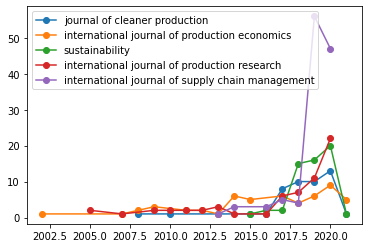

In [55]:
for i in range(5, len(dd_df.columns)):
#     series = pd.Series(dd_df[dd_df.columns[i]].dropna())
#     plt.plot(*SerToArr(series), linestyle='-', marker='o', label=dd_df.columns[i])
    plt.plot(dd_df[dd_df.columns[i]].dropna(), linestyle='-', marker='o', label=dd_df.columns[i])
    
plt.legend(loc='upper left')
plt.show()